In [1]:
# Importing the libraries
import pandas as pd
import kagglehub
import os
import numpy as np

/Users/adityaprakash/Desktop/ai-ml-project/Vehicle-Maintenance-Prediction/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("chavindudulaj/vehicle-maintenance-data")
print(path)
# Load the dataset
csv_path = os.path.join(path, "vehicle_maintenance_data.csv")
data = pd.read_csv(csv_path)
print(data.head())

/Users/adityaprakash/.cache/kagglehub/datasets/chavindudulaj/vehicle-maintenance-data/versions/1
  Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Ty

In [3]:
# Data Validation 
#imbalance check
imbalance = data['Need_Maintenance'].value_counts(normalize=True)
imbalance

Need_Maintenance
1    0.80996
0    0.19004
Name: proportion, dtype: float64

In [4]:
# correlation matrix
corr_matrix = data.select_dtypes(include=[np.number]).corr()
corr_matrix

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
Mileage,1.000000,0.004311,0.000341,0.006994,-0.002929,-0.004834,-0.001166,0.002185,0.012465,0.000704
Reported_Issues,0.004311,1.000000,-0.004607,-0.000349,0.000119,0.000248,-0.002567,0.007023,0.003954,0.389273
Vehicle_Age,0.000341,-0.004607,1.000000,-0.006184,-0.000556,0.003263,0.001983,-0.005237,-0.004572,0.000806
Engine_Size,0.006994,-0.000349,-0.006184,1.000000,-0.000369,-0.009805,0.009459,0.000589,-0.000645,-0.000326
Odometer_Reading,-0.002929,0.000119,-0.000556,-0.000369,1.000000,-0.009439,0.000107,0.001599,0.004281,0.007876
Insurance_Premium,-0.004834,0.000248,0.003263,-0.009805,-0.009439,1.000000,-0.007262,0.000120,-0.003988,0.004775
Service_History,-0.001166,-0.002567,0.001983,0.009459,0.000107,-0.007262,1.000000,0.003199,0.004532,0.104155
Accident_History,0.002185,0.007023,-0.005237,0.000589,0.001599,0.000120,0.003199,1.000000,0.002825,0.080590
Fuel_Efficiency,0.012465,0.003954,-0.004572,-0.000645,0.004281,-0.003988,0.004532,0.002825,1.000000,0.001874
Need_Maintenance,0.000704,0.389273,0.000806,-0.000326,0.007876,0.004775,0.104155,0.080590,0.001874,1.000000


In [5]:
# Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

In [6]:
# Romove outliers using IQR method
for col in ['Mileage', 'Engine_Size', 'Odometer_Reading']:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [7]:
# Data Standardization
# stripping white spaces
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].str.strip().str.title()
data

/var/folders/22/dyr__6r51_j3_bd6m3c4m7580000gn/T/ipykernel_66991/2130269442.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = data.select_dtypes(include=['object']).columns


,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Car,77229,Good,3,6,Diesel,Automatic,2500,97404,2023-11-24,2025-09-15,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Truck,54742,Good,4,4,Diesel,Manual,800,13421,2023-07-14,2025-01-21,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Van,75601,Poor,0,4,Electric,Automatic,1500,124851,2023-09-09,2024-11-09,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Car,66181,Good,1,7,Electric,Manual,2500,103182,2023-08-26,2025-05-22,Third,5030,4,3,10.720555,New,Good,Weak,1


In [8]:
# feature engineering
# Aging Factor
data['aging_factor'] = data['Vehicle_Age'] ** 1.5  # Exponential relationship
data['aging_factor']

0         8.000000
1        18.520259
2         2.828427
3        11.180340
4         1.000000
           ...    
49995    14.696938
49996     8.000000
49997     8.000000
49998    18.520259
49999    31.622777
Name: aging_factor, Length: 50000, dtype: float64

In [9]:
data['mileage_age_interaction'] = data['Mileage'] * data['Vehicle_Age']
data['issues_mileage_interaction'] = data['Reported_Issues'] * data['Mileage']

In [10]:
# maintainance risk score
data['maintenance_risk_score'] = (
        (data['Reported_Issues'] * 12) + 
        (data['Mileage'] * 0.5) + 
        (data['Vehicle_Age'] * 3)
    ).clip(0, 100)
data['maintenance_risk_score']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
49995    100.0
49996    100.0
49997    100.0
49998    100.0
49999    100.0
Name: maintenance_risk_score, Length: 50000, dtype: float64

In [11]:
# since maintenance_risk_score is of no use all values are 100
data.drop(columns=['maintenance_risk_score'], inplace=True)

In [12]:
# date formating
data['Last_Service_Date'] = pd.to_datetime(data['Last_Service_Date'])
data['Warranty_Expiry_Date'] = pd.to_datetime(data['Warranty_Expiry_Date'])

In [13]:

data['Days_Since_Last_Service'] = (pd.Timestamp.today() - data['Last_Service_Date']).dt.days
data['Warranty_Remaining_Days'] = (data['Warranty_Expiry_Date'] - pd.Timestamp.today()).dt.days

In [14]:
#remove original date columns
data.drop(columns=['Last_Service_Date','Warranty_Expiry_Date'], inplace=True)

In [15]:
# One-hot encoding
data = pd.get_dummies(data, drop_first=True)
data

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance,...,Fuel_Type_Petrol,Transmission_Type_Manual,Owner_Type_Second,Owner_Type_Third,Tire_Condition_New,Tire_Condition_Worn Out,Brake_Condition_New,Brake_Condition_Worn Out,Battery_Status_New,Battery_Status_Weak
0,58765,0,4,2000,28524,20782,6,3,13.622204,1,...,False,False,True,False,True,False,True,False,False,True
1,60353,1,7,2500,133630,23489,7,0,13.625307,1,...,False,False,True,False,True,False,True,False,False,True
2,68072,0,2,1500,34022,17979,7,0,14.306302,1,...,False,False,False,False,True,False,False,False,False,True
3,60849,4,5,2500,81636,6220,7,3,18.709467,1,...,True,False,True,False,True,False,False,True,True,False
4,45742,5,1,2000,97162,16446,6,2,16.977482,1,...,True,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,77229,3,6,2500,97404,5217,4,1,10.357298,1,...,False,False,False,True,True,False,False,False,False,True
49996,54742,4,4,800,13421,15856,4,1,14.924022,1,...,False,True,True,False,False,True,True,False,False,False
49997,75601,0,4,1500,124851,6019,10,0,19.859243,1,...,False,False,False,False,False,True,False,True,False,True
49998,66181,1,7,2500,103182,5030,4,3,10.720555,1,...,False,True,False,True,True,False,False,False,False,True


In [16]:
# Define X and y
X = data.drop('Need_Maintenance', axis=1)
y = data['Need_Maintenance']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Users/adityaprakash/Desktop/ai-ml-project/Vehicle-Maintenance-Prediction/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      1900
           1       0.88      0.94      0.91      8100

    accuracy                           0.85     10000
   macro avg       0.76      0.70      0.72     10000
weighted avg       0.84      0.85      0.84     10000

ROC AUC: 0.8780667966211826


In [20]:
# Decision Tree (multiple)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1900
           1       1.00      1.00      1.00      8100

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [21]:
# feature importance
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)

Battery_Status_Weak           0.197415
Brake_Condition_Worn Out      0.194367
Reported_Issues               0.163320
issues_mileage_interaction    0.103365
Service_History               0.059087
Accident_History              0.042583
Maintenance_History_Poor      0.031735
Maintenance_History_Good      0.030233
Battery_Status_New            0.026788
Brake_Condition_New           0.023181
dtype: float64

## Step 1: Investigate RF Overfitting & Cross-Validation
Check if the 100% accuracy is real or caused by data leakage.

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Cross-validation on Random Forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Random Forest Cross-Validation Results:")
print(f"  Scores: {rf_cv_scores}")
print(f"  Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")

# Check if interaction features leak target info
print("\nCorrelation of engineered features with target:")
leak_features = ['issues_mileage_interaction', 'mileage_age_interaction', 'aging_factor']
for feat in leak_features:
    if feat in X.columns:
        corr = data[[feat, 'Need_Maintenance']].corr().iloc[0, 1]
        print(f"  {feat}: {corr:.4f}")

Random Forest Cross-Validation Results:
  Scores: [1.     1.     1.     1.     0.9999]
  Mean Accuracy: 1.0000 (+/- 0.0000)

Correlation of engineered features with target:
  issues_mileage_interaction: 0.3543
  mileage_age_interaction: 0.0014
  aging_factor: 0.0013


In [23]:
# Train RF without potentially leaky interaction features to compare
X_no_leak = X.drop(columns=[c for c in ['issues_mileage_interaction', 'mileage_age_interaction', 'aging_factor'] if c in X.columns])
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_no_leak, y, test_size=0.2, random_state=42, stratify=y)

rf_no_leak = RandomForestClassifier(random_state=42)
rf_no_leak.fit(X_train_nl, y_train_nl)
rf_nl_cv = cross_val_score(rf_no_leak, X_no_leak, y, cv=cv, scoring='accuracy')

print("RF WITHOUT interaction features:")
print(f"  CV Mean Accuracy: {rf_nl_cv.mean():.4f} (+/- {rf_nl_cv.std():.4f})")
print(f"  Test Accuracy: {rf_no_leak.score(X_test_nl, y_test_nl):.4f}")

print("\nRF WITH interaction features:")
print(f"  CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")

RF WITHOUT interaction features:
  CV Mean Accuracy: 1.0000 (+/- 0.0000)
  Test Accuracy: 1.0000

RF WITH interaction features:
  CV Mean Accuracy: 1.0000 (+/- 0.0000)


## Step 2: Scale Features + Retrain Logistic Regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create scaled Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr_scaled = lr_pipeline.predict(X_test)
y_prob_lr_scaled = lr_pipeline.predict_proba(X_test)[:, 1]

print("Scaled Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr_scaled))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr_scaled):.4f}")

# Cross-validate
lr_cv = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')
print(f"CV Mean Accuracy: {lr_cv.mean():.4f} (+/- {lr_cv.std():.4f})")

Scaled Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1900
           1       0.97      0.97      0.97      8100

    accuracy                           0.95     10000
   macro avg       0.93      0.92      0.93     10000
weighted avg       0.95      0.95      0.95     10000

ROC AUC: 0.9886
CV Mean Accuracy: 0.9515 (+/- 0.0012)


## Step 3: XGBoost Model

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")

xgb_cv = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')
print(f"CV Mean Accuracy: {xgb_cv.mean():.4f} (+/- {xgb_cv.std():.4f})")

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1900
           1       1.00      1.00      1.00      8100

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 1.0000
CV Mean Accuracy: 1.0000 (+/- 0.0000)


## Step 4: Confusion Matrix & ROC Curves

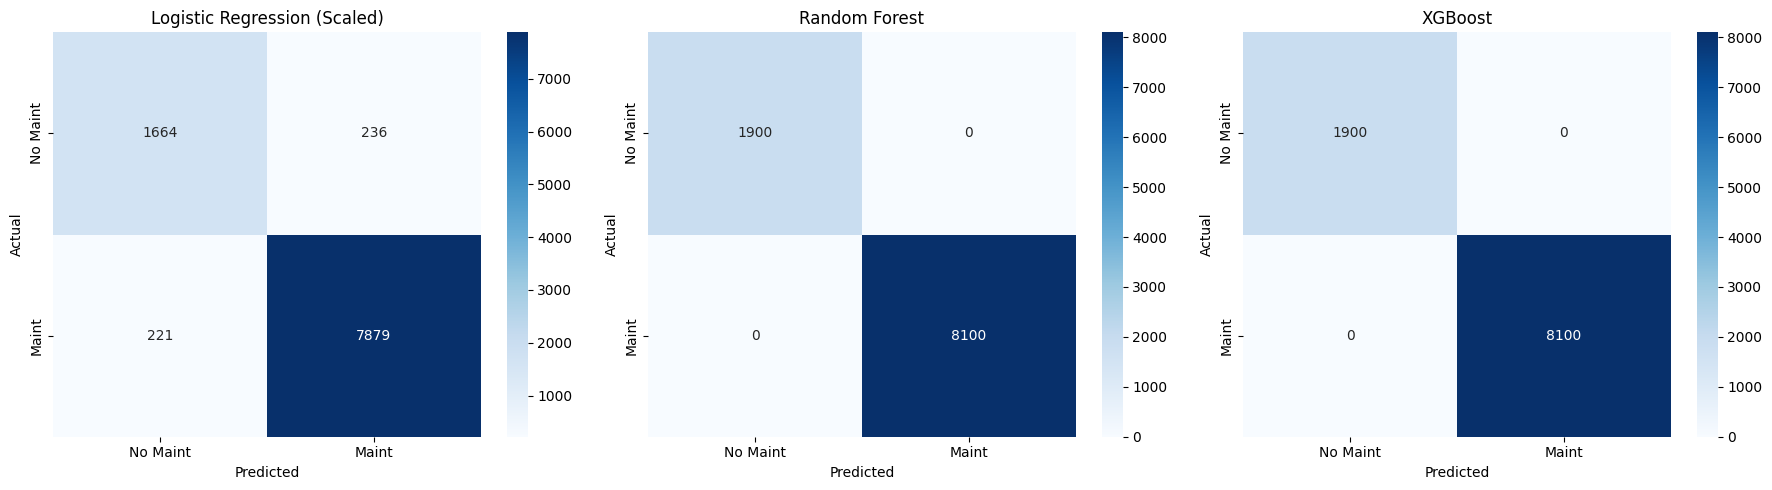

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, RocCurveDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ("Logistic Regression (Scaled)", y_pred_lr_scaled),
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb),
]

for ax, (name, preds) in zip(axes, models_data):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Maint', 'Maint'],
                yticklabels=['No Maint', 'Maint'])
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

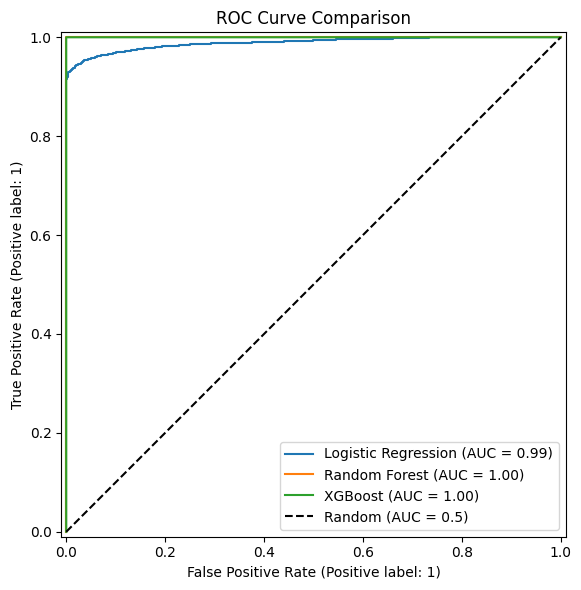

In [27]:
# ROC Curves Comparison
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(y_test, y_prob_lr_scaled, name="Logistic Regression", ax=ax)
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], name="Random Forest", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost", ax=ax)

ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
ax.set_title("ROC Curve Comparison")
ax.legend()
plt.tight_layout()
plt.show()

In [29]:
# Model Comparison Summary
comparison = pd.DataFrame({
    'Model': ['Logistic Regression (Scaled)', 'Random Forest', 'XGBoost'],
    'Test Accuracy': [
        lr_pipeline.score(X_test, y_test),
        rf.score(X_test, y_test),
        xgb_model.score(X_test, y_test)
    ],
    'CV Mean Accuracy': [lr_cv.mean(), rf_cv_scores.mean(), xgb_cv.mean()],
    'CV Std': [lr_cv.std(), rf_cv_scores.std(), xgb_cv.std()],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr_scaled),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, y_prob_xgb)
    ]
}).sort_values('ROC AUC', ascending=False)

comparison

,Model,Test Accuracy,CV Mean Accuracy,CV Std,ROC AUC
1,Random Forest,1.0000,0.99998,0.000040,1.000000
2,XGBoost,1.0000,1.00000,0.000000,1.000000
0,Logistic Regression (Scaled),0.9543,0.95146,0.001248,0.988615


## Step 5: SHAP Explainability

SHAP Summary Plot - Global Feature Importance


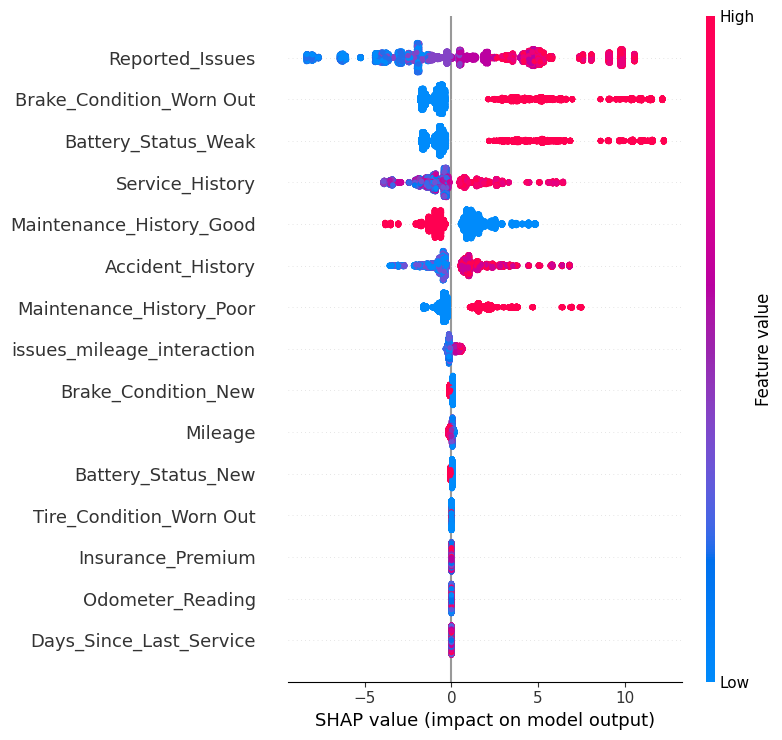

In [30]:
import shap

# Use XGBoost for SHAP (tree-based SHAP is fast and accurate)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
print("SHAP Summary Plot - Global Feature Importance")
shap.summary_plot(shap_values, X_test, max_display=15, show=True)

SHAP Bar Plot - Mean |SHAP| Values


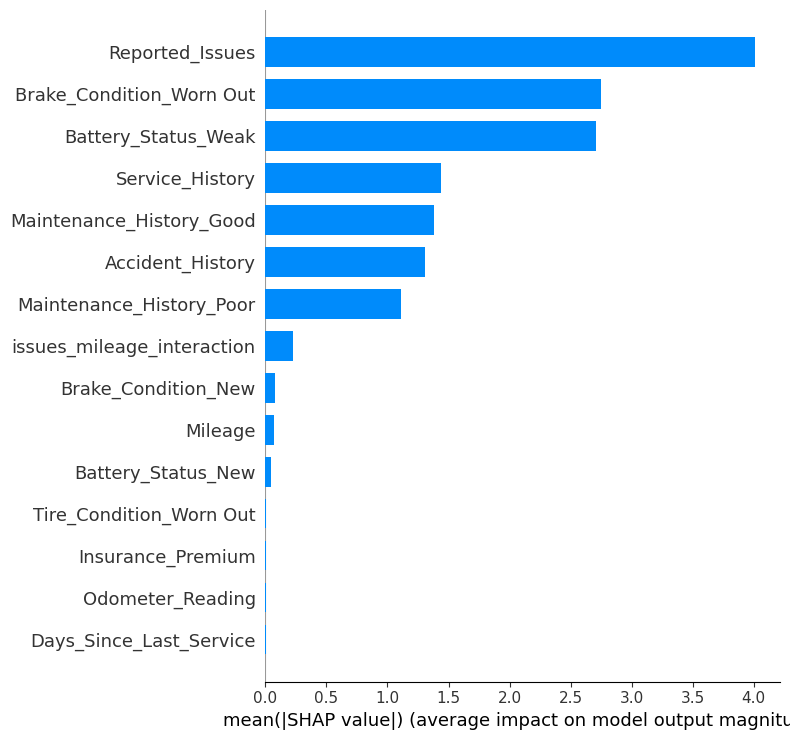

In [31]:
# SHAP bar plot (mean absolute SHAP values)
print("SHAP Bar Plot - Mean |SHAP| Values")
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=True)

SHAP Waterfall - Explaining a single high-risk prediction


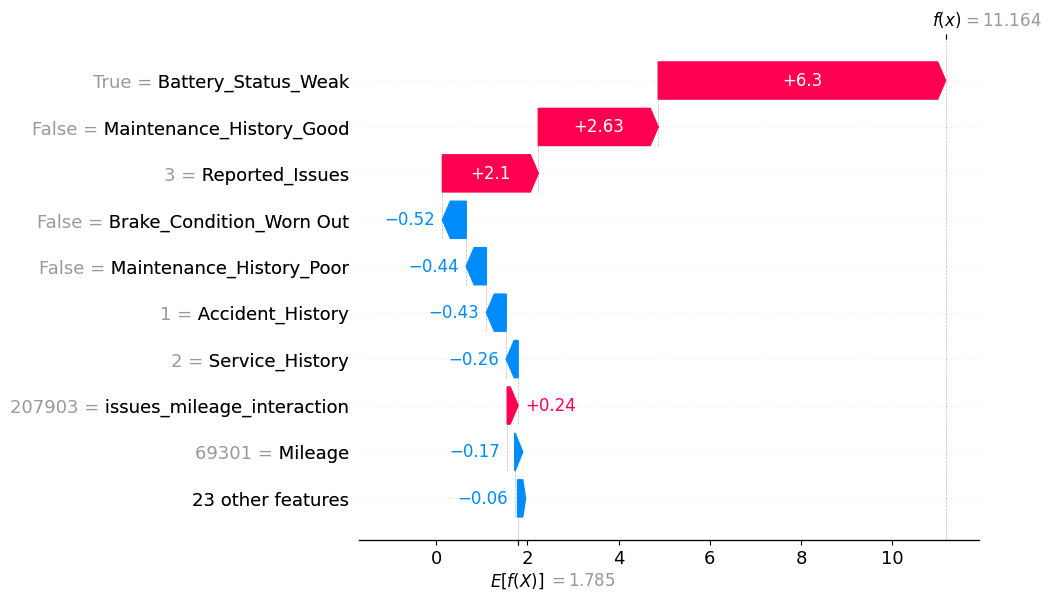

In [32]:
# SHAP for a single prediction (local explanation)
print("SHAP Waterfall - Explaining a single high-risk prediction")
idx = y_test[y_test == 1].index[0]
idx_pos = list(X_test.index).index(idx)

shap.plots.waterfall(shap.Explanation(
    values=shap_values[idx_pos],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_pos],
    feature_names=X_test.columns.tolist()
))

## Step 6: Export Best Model

In [33]:
import joblib
import os

os.makedirs('models', exist_ok=True)

# Save XGBoost
joblib.dump(xgb_model, 'models/xgb_model.joblib')
# Save Random Forest
joblib.dump(rf, 'models/rf_model.joblib')
# Save Logistic Regression pipeline (includes scaler)
joblib.dump(lr_pipeline, 'models/lr_pipeline.joblib')
# Save feature names for inference
joblib.dump(list(X.columns), 'models/feature_columns.joblib')

print("Models saved to models/ directory:")
for f in os.listdir('models'):
    size = os.path.getsize(f'models/{f}') / (1024*1024)
    print(f"  {f}: {size:.2f} MB")

Models saved to models/ directory:
  lr_pipeline.joblib: 0.00 MB
  feature_columns.joblib: 0.00 MB
  xgb_model.joblib: 0.24 MB
  rf_model.joblib: 14.75 MB


In [34]:
# Quick verification: load model and predict
loaded_model = joblib.load('models/xgb_model.joblib')
loaded_features = joblib.load('models/feature_columns.joblib')

sample = X_test.iloc[:3]
preds = loaded_model.predict(sample)
probs = loaded_model.predict_proba(sample)[:, 1]

print("Verification - Loaded model predictions:")
for i in range(3):
    print(f"  Sample {i+1}: Prediction={preds[i]}, Probability={probs[i]:.4f}")
print(f"\nFeature columns count: {len(loaded_features)}")
print("Model export verified successfully!")

Verification - Loaded model predictions:
  Sample 1: Prediction=1, Probability=1.0000
  Sample 2: Prediction=0, Probability=0.0013
  Sample 3: Prediction=1, Probability=0.9996

Feature columns count: 32
Model export verified successfully!
